# Conducción 1D en estado estacionario sin generación de calor


$$
k \,\frac{d^2 T}{dx^2} = 0
$$

donde:
- $k$ = conductividad térmica (constante).



## Solución general
Simplificando e integrando dos veces:

$$
\frac{d^2 T}{dx^2} = 0
$$


$$
T(x) = C_1 x + C_2
$$



## Condiciones de frontera

- $T(0) = T_1 \;\Rightarrow\; C_2 = T_1$.
- $T(L) = T_2 \;\Rightarrow\; C_1 L + T_1 = T_2$.

Luego:

$$
C_1 = \frac{T_2 - T_1}{L}
$$



## Distribución de temperatura

Sustituyendo las constantes se obtiene el perfil de temperaturas, que es lineal:

$$
T(x) = T_1 + \frac{T_2 - T_1}{L}\,x
$$


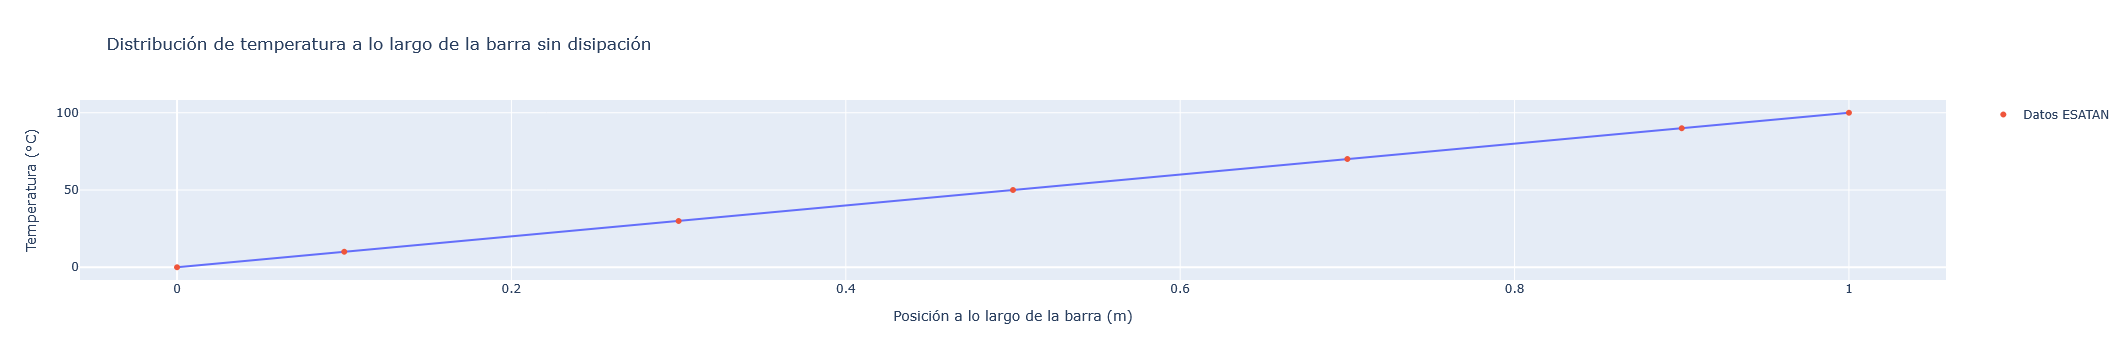

In [1]:
import numpy as np
import plotly.express as px

# ----------- 1. Datos de la barra -----------
L = 1.0
W = 0.1
H = 0.1

# Propiedades del material
k = 180  # Conductividad en W/m·K
# -----------------------------------------


# ------ 2. Condiciones de contorno ------
T1 = 0
T2 = 100
# -------------------------------------


# ------ 3. Cálculo temperatura analítica --------
def T_lineal(x):
    """Calcula la temperatura en un punto x a lo largo de la barra cuando no hay disipación."""
    return T1 + x*(T2-T1)/L

# Puntos a lo largo de la barra
x = np.linspace(0, L, 100)
T_analitica = T_lineal(x)
# ---------------------------------------------


# ------ 4. Cargar datos de ESATAN ------
from helpers.funs import read_fx_t
x_esatan, T_esatan = read_fx_t("data/esatan_barra/BARRA_NO_DISSIPATION_5.out")
# ------ --------------------- ------


# ------- 5. Pintamos los resultados ------

# Solucion analítica
fig = px.line(
    x=x,
    y=T_analitica,
    labels={"x": "Posición a lo largo de la barra (m)", "y": "Temperatura (°C)"},
    title="Distribución de temperatura a lo largo de la barra sin disipación",
)

# Datos de ESATAN
fig.add_scatter(
    x=x_esatan,
    y=T_esatan,
    mode="markers",
    name="Datos ESATAN"
)

fig.show()
# ---------------------------------------



# Conducción 1D en estado estacionario con generación volumétrica de calor


$$
0 = k \,\frac{d^2 T}{dx^2} + q_v
$$

donde:
- $k$ = conductividad térmica
- $q_v$ = generación volumétrica de calor



## Solución general

Reordenando e integrando dos veces:

$$
\frac{d^2 T}{dx^2} = -\frac{q_v}{k}
$$


$$
T(x) = -\frac{q_v}{2k}x^2 + C_1 x + C_2
$$



## Condiciones de frontera

- $T(0) = T_1 \;\Rightarrow\; C_2 = T_1$.
-  $T(L) = T_2 \;\Rightarrow\; -\frac{q_v}{2k}L^2 + C_1 L + T_1 = T_2$.

De aquí se obtiene:

$$
C_1 = \frac{T_2 - T_1}{L} + \frac{q_v L}{2k}
$$



## Distribución de temperatura

Sustituyendo las constantes se obtiene la distribución:

$$
T(x) = T_1 + \frac{T_2 - T_1}{L} \,x + \frac{q_v}{2k}\left(Lx - x^2\right)
$$


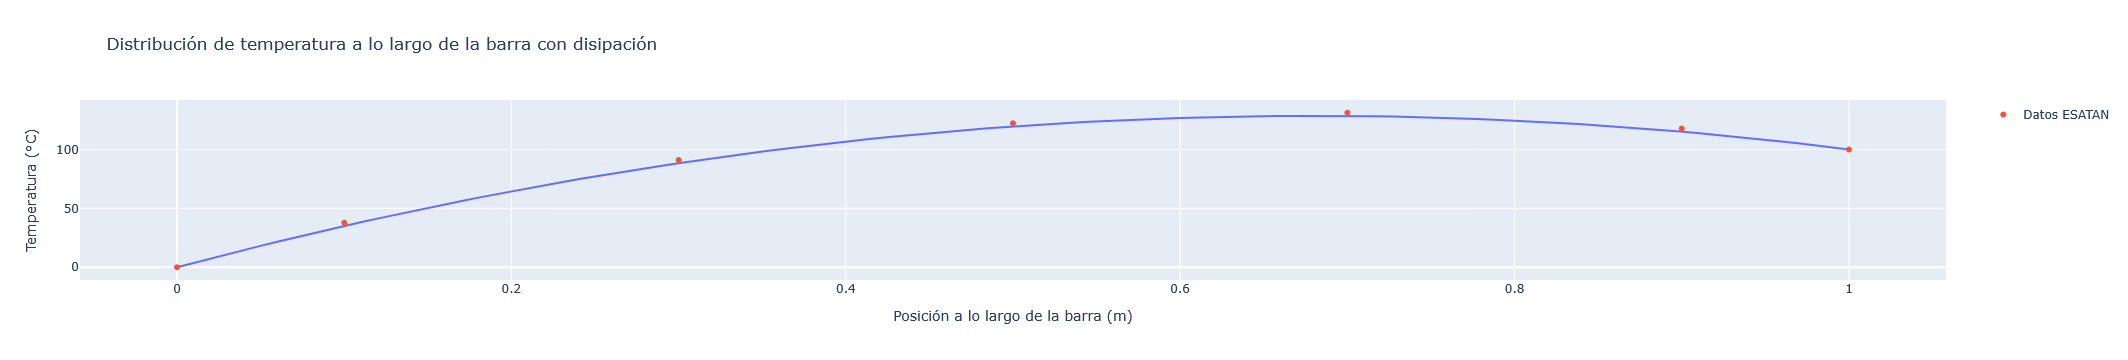

In [2]:
import numpy as np
import plotly.express as px

# ----------- 1. Datos de la barra -----------
L = 1.0
W = 0.1
H = 0.1

# Propiedades del material
k = 180  # Conductividad en W/m·K

# Flujo de calor volumétrico
q = 1000 / (L * W * H)  # W/m^3
# -----------------------------------------

# ------ 2. Condiciones de contorno ------
T1 = 0
T2 = 100
# -------------------------------------


# ------ 3. Cálculo temperatura analítica --------
def T_disipacion(x):
    """Calcula la temperatura en un punto x a lo largo de la barra cuando hay disipación."""
    return T1 + (T2 - T1) * (x / L) + (q / (2 * k)) * (L * x - x**2)

# Puntos a lo largo de la barra
x = np.linspace(0, L, 100)
T_analitica = T_disipacion(x)
# ---------------------------------------------



# ------ 4. Cargar datos de ESATAN ------
from helpers.funs import read_fx_t
x_esatan, T_esatan = read_fx_t("data/esatan_barra/BARRA_DISSIPATION_5.out")
# ------ --------------------- ------


# ------- 5. Pintamos los resultados ------

# Solucion analítica
fig = px.line(
    x=x,
    y=T_analitica,
    labels={"x": "Posición a lo largo de la barra (m)", "y": "Temperatura (°C)"},
    title="Distribución de temperatura a lo largo de la barra con disipación",
)

# Datos de ESATAN
fig.add_scatter(
    x=x_esatan,
    y=T_esatan,
    mode="markers",
    name="Datos ESATAN"
)

fig.show()
# ---------------------------------------


# Barra 3D
Ejecuta la celda anterior para que los datos de la barra estén disponibles

In [3]:
import pyvista as pv
import helpers.configure_pyvista_notebook


# --- Crea un modelo 3D de la barra --
Nx = 100
x_coords = np.linspace(0, L, Nx)
y_coords = np.array([-W/2,  W/2])
z_coords = np.array([-H/2,  H/2])
grid = pv.RectilinearGrid(x_coords, y_coords, z_coords)

# Calcula las temperaturas en el centro de cada celda
T_cells = T_disipacion(x_coords[:-1] + np.diff(x_coords)) # Necesitamos la x en el centro

# Asigna las temperaturas a las celdas de la malla
grid.cell_data.clear()
grid.cell_data['temperature'] = T_cells
# -------------------------------------


# --- Visualiza el modelo interactivo de la barra en 3D ---
p = pv.Plotter()
p.add_mesh(
    grid,
    scalars='temperature',
    cmap='turbo',
    show_edges=True,
    edge_color='black',
    lighting=True,
    smooth_shading=False
)

p.add_bounding_box(color='gray')
p.show()
# -------------------------------------------------------

Widget(value='<iframe src="http://localhost:53534/index.html?ui=P_0x1d96d4d56a0_0&reconnect=auto" class="pyvis…